# Granger Causality in Time Series Analysis on Synthetic Data
### Author: Kgomotso Larry Sebela
### Matriculation number: 102306255
### IU International University of Applied Sciences
### Tutor/Lecturer: Dr. Bertram Taetz
### Date: 13 July 2024

## Introduction
* This notebook aims to explain the concept of Granger causality in the context of time series data, using stock market analysis as an example. 

* It includes code implementations, and visualizations to demonstrate the principles of Granger causality and its implications in financial data analysis.


## Methodolody
* Data Visualization: Plotting stock price and trading volume to understand their trends.

* Granger Causality Test: Using the statsmodels library to perform the Granger causality test on the dataset.

* The coding is implemented in Python (Python 3.11.5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
# Generate Synthetic Stock Data consisting of Date, Stock Price and Trading Volume
np.random.seed(42)
dates = pd.date_range(start='1994-01-01', periods=200)
price = np.cumsum(np.random.randn(200)) + 1e-9
volume = np.cumsum(np.random.randn(200)) + 50

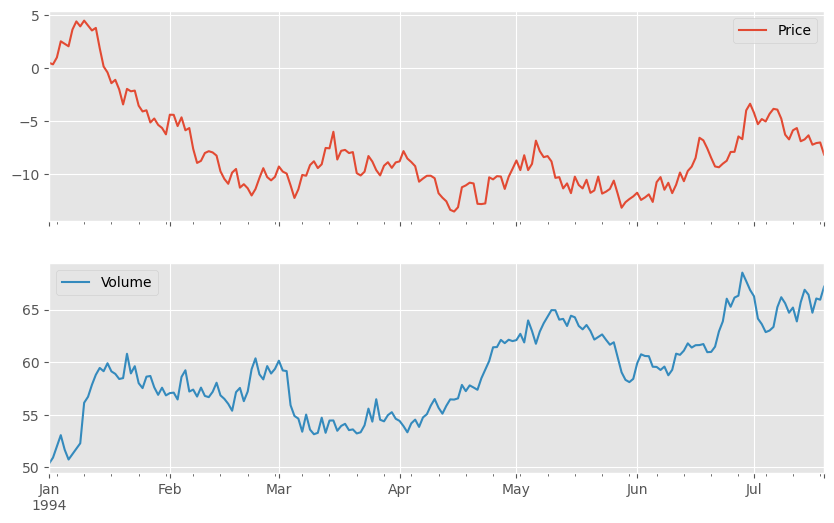

In [3]:
# Create a pandas DataFrame
data = pd.DataFrame({'Price': price, 'Volume': volume}, index=dates)
data.plot(subplots=True, figsize=(10, 6))
plt.legend()
plt.show()

In [4]:
# Perform Granger Causality Test
max_lag = 5
test_result = grangercausalitytests(data[['Price', 'Volume']], max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2844  , p=0.5944  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.2888  , p=0.5910  , df=1
likelihood ratio test: chi2=0.2886  , p=0.5911  , df=1
parameter F test:         F=0.2844  , p=0.5944  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7946  , p=0.4532  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=1.6304  , p=0.4426  , df=2
likelihood ratio test: chi2=1.6237  , p=0.4440  , df=2
parameter F test:         F=0.7946  , p=0.4532  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4789  , p=0.6973  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=1.4896  , p=0.6847  , df=3
likelihood ratio test: chi2=1.4840  , p=0.6860  , df=3
parameter F test:         F=0.4789  , p=0.6973  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2722  , p=0.8956  

# Granger Causality Test Interpretation

The Granger Causality test results indicate whether past values of one time series (trading volume) have any predictive power over another time series (stock price). Here's the interpretation of the results for different lags:

## Lag 1
| Test                     | Statistic | p-value | df_denom | df_num |
|--------------------------|-----------|---------|----------|--------|
| SSR based F test         | 0.2844    | 0.5944  | 196      | 1      |
| SSR based chi2 test      | 0.2888    | 0.5910  |          | 1      |
| Likelihood ratio test    | 0.2886    | 0.5911  |          | 1      |
| Parameter F test         | 0.2844    | 0.5944  | 196      | 1      |

## Lag 2
| Test                     | Statistic | p-value | df_denom | df_num |
|--------------------------|-----------|---------|----------|--------|
| SSR based F test         | 0.7946    | 0.4532  | 193      | 2      |
| SSR based chi2 test      | 1.6304    | 0.4426  |          | 2      |
| Likelihood ratio test    | 1.6237    | 0.4440  |          | 2      |
| Parameter F test         | 0.7946    | 0.4532  | 193      | 2      |

## Lag 3
| Test                     | Statistic | p-value | df_denom | df_num |
|--------------------------|-----------|---------|----------|--------|
| SSR based F test         | 0.4789    | 0.6973  | 190      | 3      |
| SSR based chi2 test      | 1.4896    | 0.6847  |          | 3      |
| Likelihood ratio test    | 1.4840    | 0.6860  |          | 3      |
| Parameter F test         | 0.4789    | 0.6973  | 190      | 3      |

## Lag 4
| Test                     | Statistic | p-value | df_denom | df_num |
|--------------------------|-----------|---------|----------|--------|
| SSR based F test         | 0.2722    | 0.8956  | 187      | 4      |
| SSR based chi2 test      | 1.1411    | 0.8877  |          | 4      |
| Likelihood ratio test    | 1.1378    | 0.8882  |          | 4      |
| Parameter F test         | 0.2722    | 0.8956  | 187      | 4      |

## Lag 5
| Test                     | Statistic | p-value | df_denom | df_num |
|--------------------------|-----------|---------|----------|--------|
| SSR based F test         | 1.0768    | 0.3747  | 184      | 5      |
| SSR based chi2 test      | 5.7060    | 0.3359  |          | 5      |
| Likelihood ratio test    | 5.6241    | 0.3445  |          | 5      |
| Parameter F test         | 1.0768    | 0.3747  | 184      | 5      |






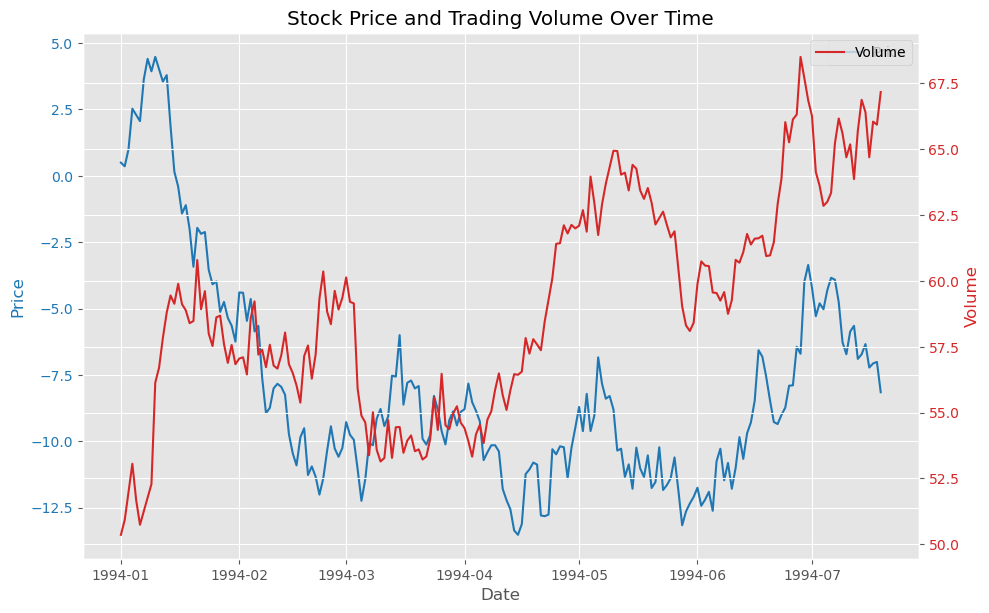

In [5]:
# Visualize the Results
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='tab:blue')
ax1.plot(data.index, data['Price'], color='tab:blue', label='Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend()

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:red')
ax2.plot(data.index, data['Volume'], color='tab:red', label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend()

fig.tight_layout()
plt.title('Stock Price and Trading Volume Over Time')
plt.legend()
plt.show()

## Conclusion
* Granger causality is useful in empirical investigations to infer causal directions and measure causal strengths between variables. It distinguishes between correlation and causation, helping economists make more informed decisions about economic policies and strategies by analyzing past data to predict future trends (Hoover, 2001).

* Granger causality is a powerful tool in time series analysis, enabling the identification of predictive relationships between variables. In stock market analysis, it helps determine whether trading volumes can predict stock prices, enhancing forecasting models and informing trading strategies. However, it is crucial to interpret Granger causality with caution, as it indicates predictive association rather than true causality "(Wikipedia contributors, 2023)".

## References
Hoover, K. D. (2001). *Causality in Macroeconomics*. Cambridge University Press.

Wikipedia contributors. (2023, June 22). Granger causality. In *Wikipedia, The Free Encyclopedia*. Retrieved July 13, 2024, from https://en.wikipedia.org/wiki/Granger_causality
